In [1]:
#Display Python version
from platform import python_version      # view python version information
import platform                          # view operating platform information

print("The Python   version from my environment is ", python_version())
print("The Platform version from my environment is ", platform.platform(terse=True))
print("The Platform release from my environment is ", platform.version())

The Python   version from my environment is  3.11.4
The Platform version from my environment is  Windows-10
The Platform release from my environment is  10.0.22631


In [2]:
#import important libraries
import pandas as pd           # for dataframe and data manipulation
from pandas import DataFrame
import numpy as np            # provides array objects and calculations

#import scikit-learn libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import CSV file
import pandas as pd
med_df = pd.read_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/medical_clean.csv")

In [4]:
#view dataset
med_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
## drop unused columns
med_df = med_df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
                      'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 
                      'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 
                      'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 
                      'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 
                      'Item4','Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [6]:
#view datatypes
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   Initial_admin       10000 non-null  object 
 2   HighBlood           10000 non-null  object 
 3   Stroke              10000 non-null  object 
 4   Complication_risk   10000 non-null  object 
 5   Overweight          10000 non-null  object 
 6   Arthritis           10000 non-null  object 
 7   Diabetes            10000 non-null  object 
 8   Hyperlipidemia      10000 non-null  object 
 9   BackPain            10000 non-null  object 
 10  Anxiety             10000 non-null  object 
 11  Allergic_rhinitis   10000 non-null  object 
 12  Reflux_esophagitis  10000 non-null  object 
 13  Asthma              10000 non-null  object 
 14  Services            10000 non-null  object 
 15  Initial_days        10000 non-null  float64
dtypes: fl

In [7]:
#check for duplicated/missing values
print(med_df.duplicated().value_counts())
print("")
print('Variables        Missing Values')
print('---------        --------------')
print(med_df.isna().sum())

False    10000
dtype: int64

Variables        Missing Values
---------        --------------
ReAdmis               0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
dtype: int64


[Text(0.5, 1.0, 'Initial_days')]

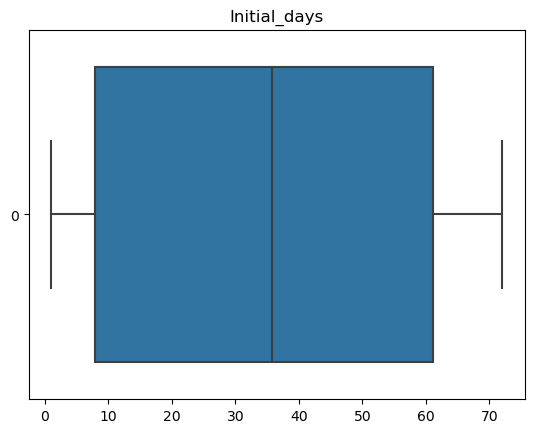

In [8]:
#check for outliers
import seaborn as sns
sns.boxplot(med_df.Initial_days, orient='h').set(title='Initial_days')

In [9]:
#One-Hot Encoding for (Yes/No) variables
prefix_list1 = ['ReAdmis','HighBlood', 'Stroke', 'Arthritis', 
               'Diabetes', 'Anxiety', 'Asthma',
               'Overweight', 'Hyperlipidemia', 'BackPain',
               'Allergic_rhinitis', 'Reflux_esophagitis']

prefix_dict = {'Yes': 1, 'No': 0}

for col in prefix_list1:
    med_df[col] = med_df[col].replace(prefix_dict)

In [10]:
#Get dummies for variables
ia = pd.get_dummies(med_df['Initial_admin'], prefix='IA', prefix_sep='_', drop_first=False)
cr = pd.get_dummies(med_df['Complication_risk'], prefix='CompRisk', prefix_sep='_', drop_first=False)
svc = pd.get_dummies(med_df['Services'], prefix='Svc', prefix_sep='_', drop_first=False)
med_df = pd.concat([med_df, ia, cr, svc], axis=1)
med_df = med_df.drop(['Initial_admin', 'Complication_risk', 'Services'], axis=1)

In [11]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ReAdmis                   10000 non-null  int64  
 1   HighBlood                 10000 non-null  int64  
 2   Stroke                    10000 non-null  int64  
 3   Overweight                10000 non-null  int64  
 4   Arthritis                 10000 non-null  int64  
 5   Diabetes                  10000 non-null  int64  
 6   Hyperlipidemia            10000 non-null  int64  
 7   BackPain                  10000 non-null  int64  
 8   Anxiety                   10000 non-null  int64  
 9   Allergic_rhinitis         10000 non-null  int64  
 10  Reflux_esophagitis        10000 non-null  int64  
 11  Asthma                    10000 non-null  int64  
 12  Initial_days              10000 non-null  float64
 13  IA_Elective Admission     10000 non-null  uint8  
 14  IA_Emer

In [12]:
#rename columns
med_df.rename(columns = {'IA_Observation Admission': 'IA_Observation'}, inplace=True)
med_df.rename(columns = {'IA_Emergency Admission': 'IA_Emergency'}, inplace=True)
med_df.rename(columns = {'IA_Elective Admission': 'IA_Elective'}, inplace=True)
med_df.rename(columns = {'Svc_Intravenous': 'Svc_IV'}, inplace=True)
med_df.rename(columns = {'Svc_CT Scan': 'Svc_CT'}, inplace=True)
med_df.rename(columns = {'Svc_Blood Work': 'Svc_BW'}, inplace=True)

In [13]:
X = med_df.drop(['ReAdmis', 'Initial_days'],1)
y = med_df['ReAdmis']

from sklearn.feature_selection import SelectKBest, f_classif
skbest = SelectKBest(score_func=f_classif, k='all')

X_new = skbest.fit_transform(X,y)

p_values = pd.DataFrame({'Feature': X.columns,
                        'p_value': skbest.pvalues_}).sort_values('p_value')
#p_values[p_values['p_value']<0.5]
features_to_keep = p_values['Feature'][p_values['p_value']<0.5]
print(features_to_keep)

18            Svc_CT
19            Svc_IV
12      IA_Emergency
10            Asthma
6           BackPain
13    IA_Observation
11       IA_Elective
20           Svc_MRI
2         Overweight
3          Arthritis
Name: Feature, dtype: object


In [14]:
med_df.columns

Index(['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Initial_days', 'IA_Elective',
       'IA_Emergency', 'IA_Observation', 'CompRisk_High', 'CompRisk_Low',
       'CompRisk_Medium', 'Svc_BW', 'Svc_CT', 'Svc_IV', 'Svc_MRI'],
      dtype='object')

In [15]:
med_df = med_df.drop(['HighBlood', 'Stroke', 'Diabetes',
       'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'CompRisk_High', 'CompRisk_Low',
       'CompRisk_Medium', 'Svc_BW'],axis=1)

In [16]:
#export CSV file
med_df.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/medical_clean_d209_t1.csv")

In [17]:
#standardize data to avoid unequal weight and/or scale
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#med_pred = med_df.drop(['ReAdmis', 'Initial_days'], axis=1)
#med_resp = med_df['ReAdmis', 'Initial_days']
#med_pred_std = pd.DataFrame(scaler.fit_transform(med_pred),
#                           columns=med_pred.columns)

#med_std = pd.concat([med_resp, med_pred_std], axis=1)

#export to csv
#med_std.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/full_med_std_d209_t1.csv")

In [18]:
#split the data into train/test sets
from sklearn.model_selection import train_test_split

X = med_df.drop(['ReAdmis'], axis=1)
y = med_df['ReAdmis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16, stratify=y)

X_train.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/X_train_d209_t1.csv")
y_train.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/y_train_d209_t1.csv")
X_test.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/X_test_d209_t1.csv")
y_test.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/y_test_d209_t1.csv")

#frames_train = [X_train, y_train]
#med_train = pd.concat(frames_train, axis=1)
#frames_test = [X_test, y_test]
#med_test = pd.concat(frames_test, axis=1)

#med_train.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/med_train_d209_t1.csv")
#med_test.to_csv("C:/Users/e0145653/Documents/WGU/D209 - Data Mining/med_test_d209_t1.csv")

In [19]:
#Initial KNN classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Initial metrics to determine model accuracy. F1 score measures accuracy. 
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred))

[[1866   33]
 [  39 1062]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1899
           1       0.97      0.96      0.97      1101

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [20]:
# Extract TN, TP, FN and FP from the initial KNN model 
TN = matrix[0,0]
TP = matrix[1,1]
FN = matrix[1,0]
FP = matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("The accuracy    of the initial model is", np.round((accuracy * 100),2), "%")

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("The sensitivity of the initial model is", np.round((sensitivity * 100),2), "%")

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("The specificity of the initial model is", np.round((specificity * 100),2), "%")

The accuracy    of the initial model is 97.6 %
The sensitivity of the initial model is 96.46 %
The specificity of the initial model is 98.26 %


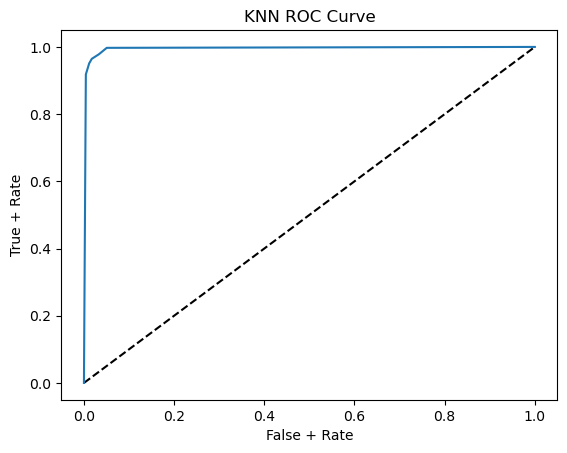

In [21]:
#Initial ROC curve
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

import matplotlib.pyplot as plt
plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='KNN')
plt.xlabel('False + Rate')
plt.ylabel('True + Rate')
plt.title('KNN ROC Curve')
plt.show()

In [22]:
#Initial AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC score of the initial model is', np.round((auc * 100),2), '%')

AUC score of the initial model is 99.5 %


In [23]:
#Grid Search to find best parameters
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {'n_neighbors': np.arange(5,180,10),
             'metric': ('manhattan', 'euclidean', 'minkowski'),
             'weights': ('uniform', 'distance')}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=kf)
knn_cv.fit(X_train, y_train)

print('Best Parameters: {}'.format(knn_cv.best_params_))
print('Best Score: {}'.format(knn_cv.best_score_))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'uniform'}
Best Score: 0.9825714285714285


In [24]:
training_score = knn_cv.score(X_train, y_train)
testing_score = knn_cv.score(X_test, y_test)

print("Training Accuracy:{}".format(training_score))
print("Testing Accuracy:{}".format(testing_score))

Training Accuracy:0.9835714285714285
Testing Accuracy:0.979


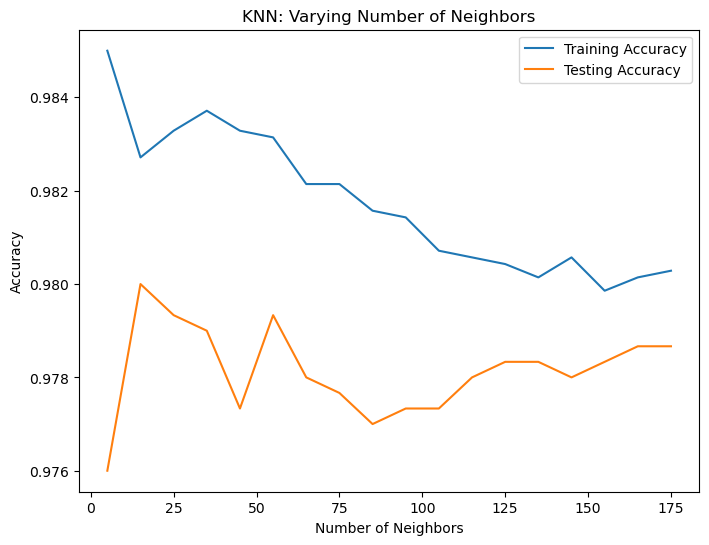

In [25]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(5,180,10)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8,6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

[[1867   32]
 [  31 1070]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1899
           1       0.97      0.97      0.97      1101

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

The accuracy    of the new model is 97.9 %
The sensitivity of the new model is 97.18 %
The specificity of the new model is 98.31 %


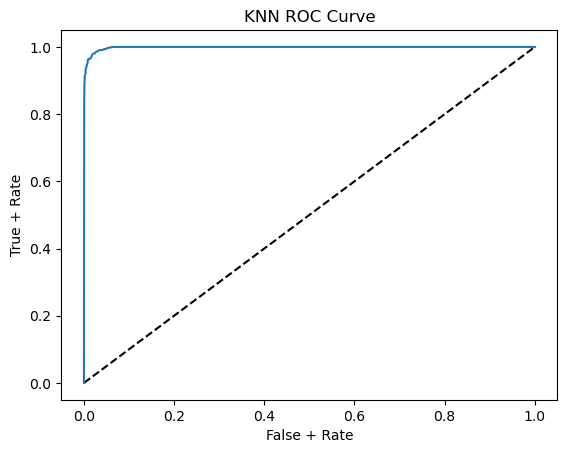

AUC score of the new model is 99.84 %


In [26]:
## KNN model with best parameters

#knn model
knn = KNeighborsClassifier(metric='manhattan',
                          n_neighbors=35,
                          weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#confusion_matrix & classification_report
best_matrix = confusion_matrix(y_test, y_pred)
print(best_matrix)
print(classification_report(y_test, y_pred))

# Extract TN, TP, FN and FP from the initial KNN model 
TN = best_matrix[0,0]
TP = best_matrix[1,1]
FN = best_matrix[1,0]
FP = best_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("The accuracy    of the new model is", np.round((accuracy * 100),2), "%")

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("The sensitivity of the new model is", np.round((sensitivity * 100),2), "%")

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("The specificity of the new model is", np.round((specificity * 100),2), "%")

y_pred_proba = knn.predict_proba(X_test)[:,1]

#New ROC curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

#New Plot
plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='KNN')
plt.xlabel('False + Rate')
plt.ylabel('True + Rate')
plt.title('KNN ROC Curve')
plt.show()

#New AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC score of the new model is', np.round((auc * 100),2), '%')